## Telecommunications Domain :- Customer Churn Prediction

### Problem Statemente:-
Predict which customers are likely to leave a service or subscription, enabling proactive retention strategies.

***Guidelines :-***
- Explore and preprocess customer data to handle missing values and outliers.
- Train models like Logistic Regression, SVM, or Gradient Boosting Machines.
- Interpret model results to identify key factors influencing churn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.drop('customerID',axis=1,inplace=True)    ## this columns is not important for my model

In [4]:
pd.set_option('display.max_columns',None)
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## Domain Analysis

The **Telco Customer Churn** dataset is a customer churn prediction dataset for a telecommunications company. It contains several features such as customer demographics, account information, service usage, and whether the customer has churned.

- **Customer information**: Gender, SeniorCitizen, Partner, Dependents
- **Subscription details**: Contract type, tenure, monthly charges
- **Services**: Internet, phone, tech support, streaming
- **Churn**: The target variable indicating if the customer left (churned) or stayed.

## Basic Check 

In [5]:
data.shape

(7043, 20)

In [6]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
data.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [12]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
data.describe(include='O')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [14]:
## Check NaN values
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
## Check duplicated values
data.duplicated().sum()

22

In [16]:
data.drop_duplicates(inplace=True)

## Explotory Data Analysis

In [17]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<Axes: ylabel='count'>

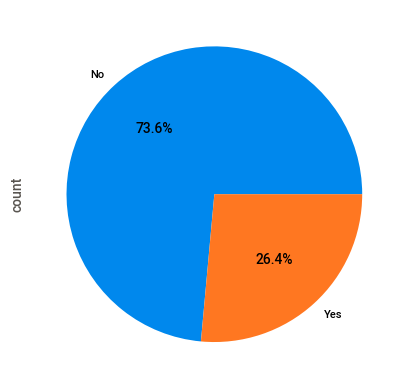

In [18]:
data.Churn.value_counts().plot(kind='pie',autopct='%1.1f%%')

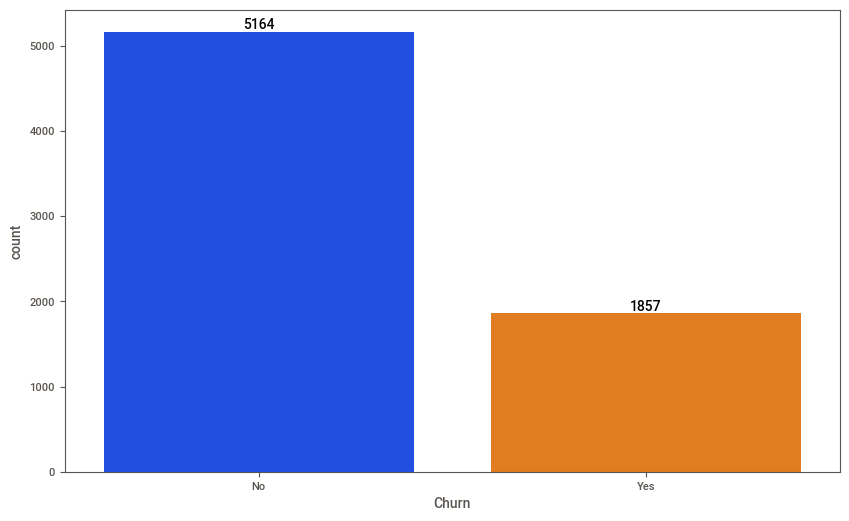

In [19]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=data.Churn,palette='bright')
for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='gender', ylabel='Churn'>

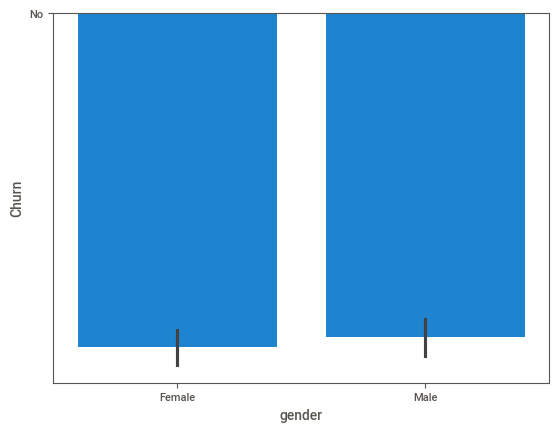

In [20]:
sns.barplot(x='gender',y='Churn',data=data)

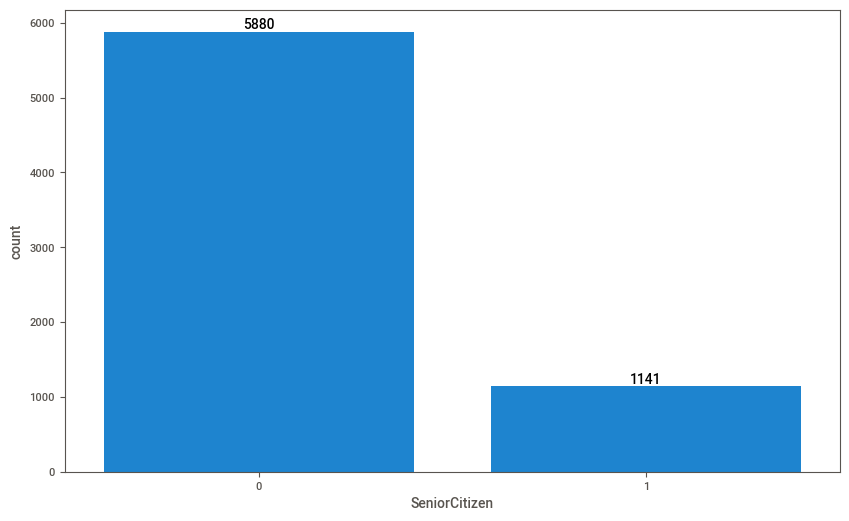

In [21]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=data.SeniorCitizen)
for i in ax.containers:
    ax.bar_label(i)

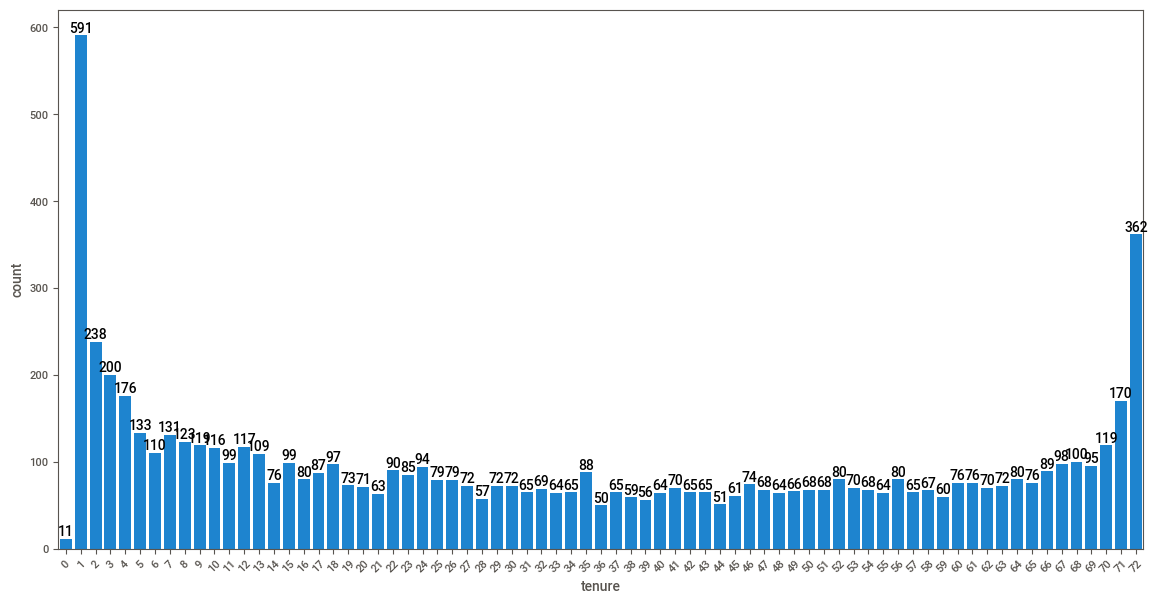

In [22]:
plt.figure(figsize=(14,7))
ax = sns.countplot(x=data.tenure)
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)

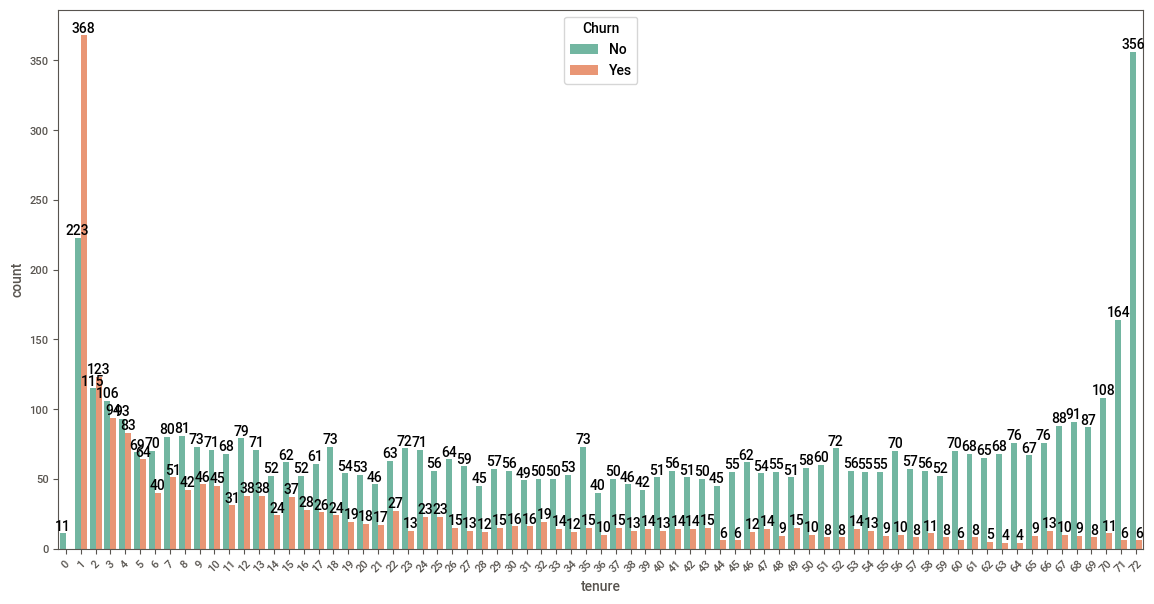

In [23]:
plt.figure(figsize=(14,7))
ax = sns.countplot(x='tenure',hue='Churn',data=data,palette='Set2')
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)

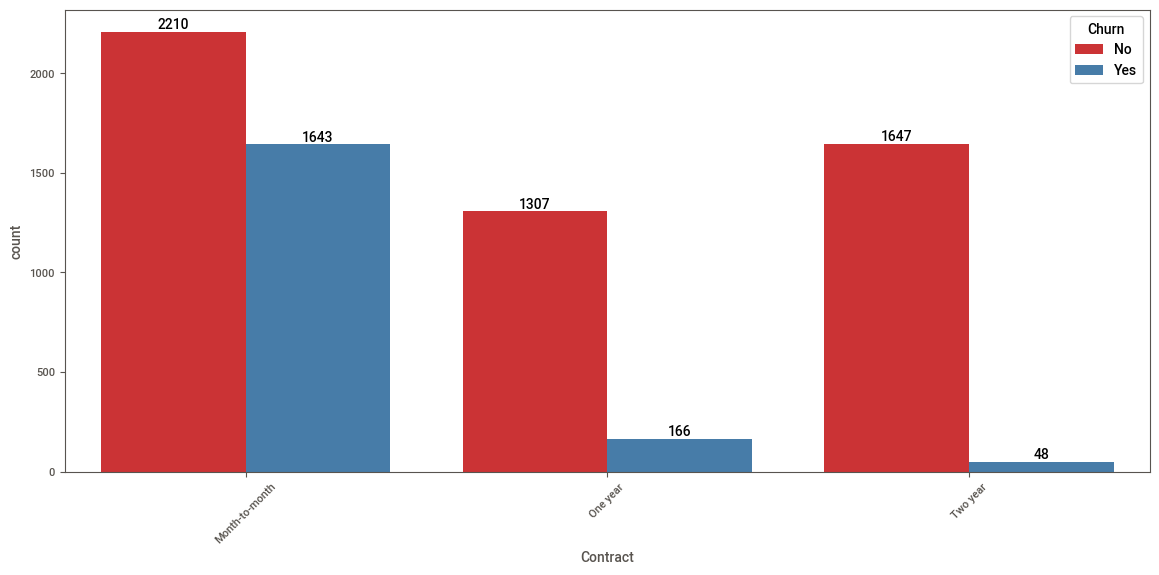

In [24]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='Contract',hue='Churn',data=data,palette='Set1')
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)

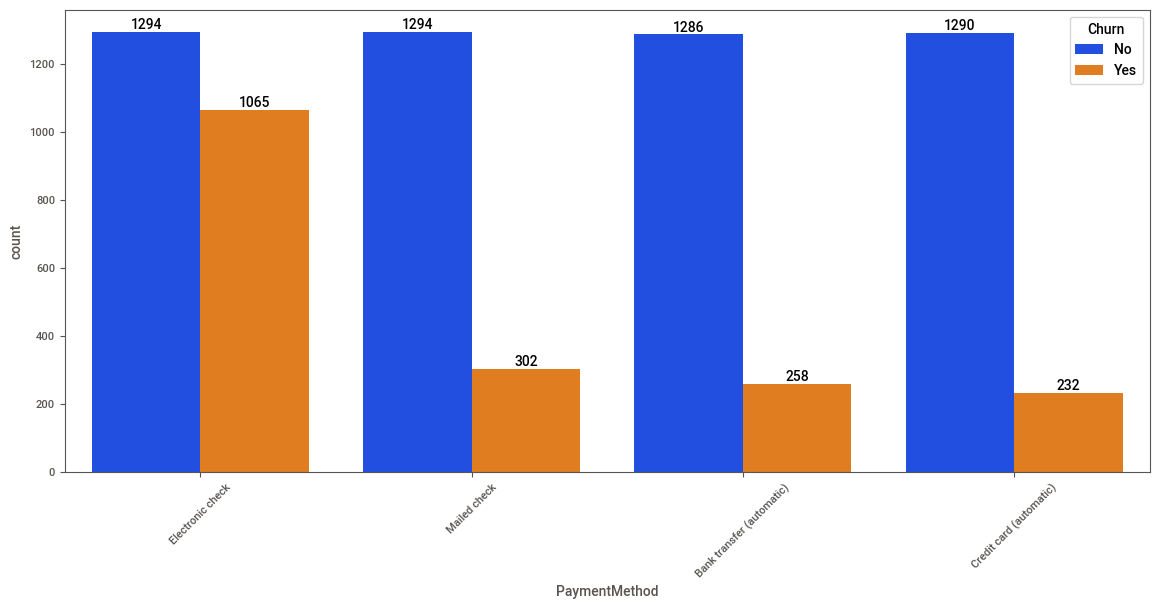

In [25]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='PaymentMethod',hue='Churn',data=data,palette='bright')
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)

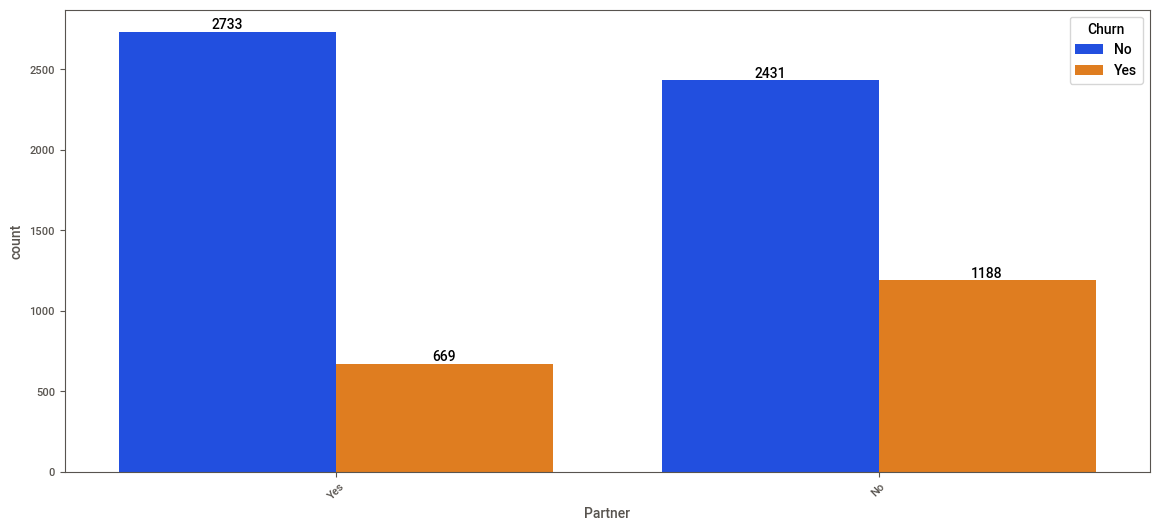

In [26]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='Partner',hue='Churn',data=data,palette='bright')
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)

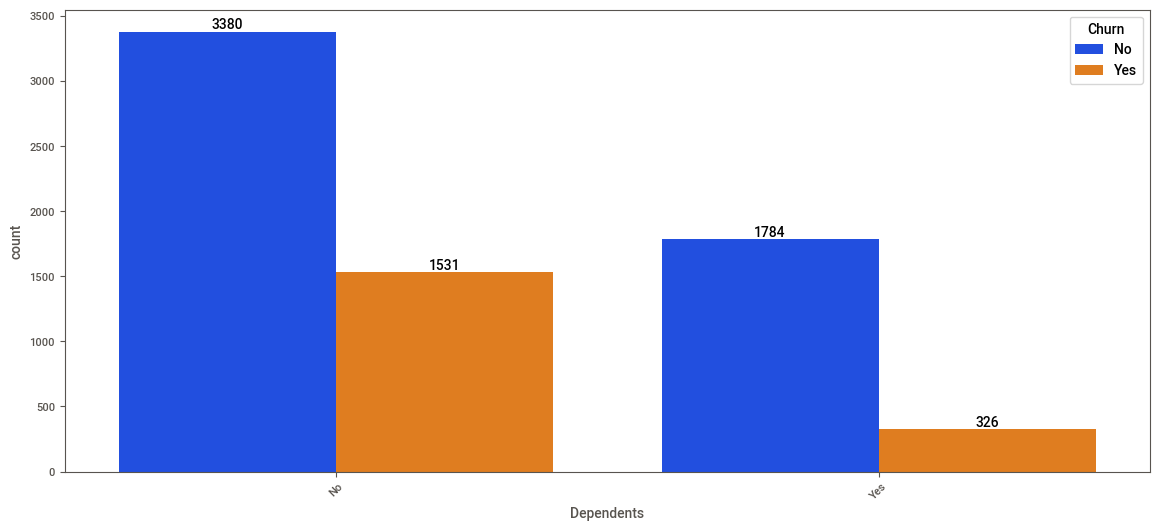

In [27]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='Dependents',hue='Churn',data=data,palette='bright')
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)

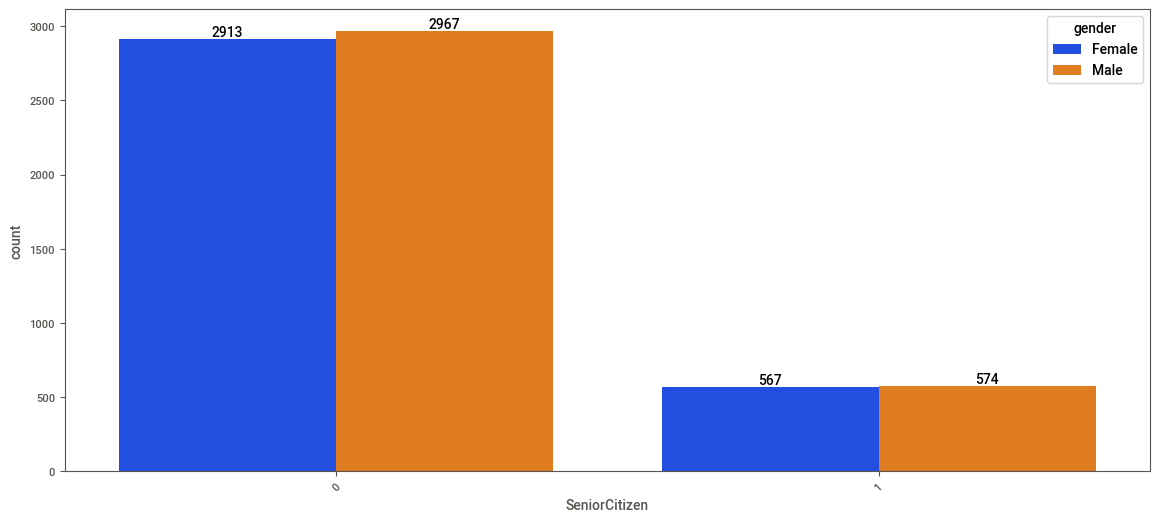

In [28]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='SeniorCitizen',hue='gender',data=data,palette='bright')
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)

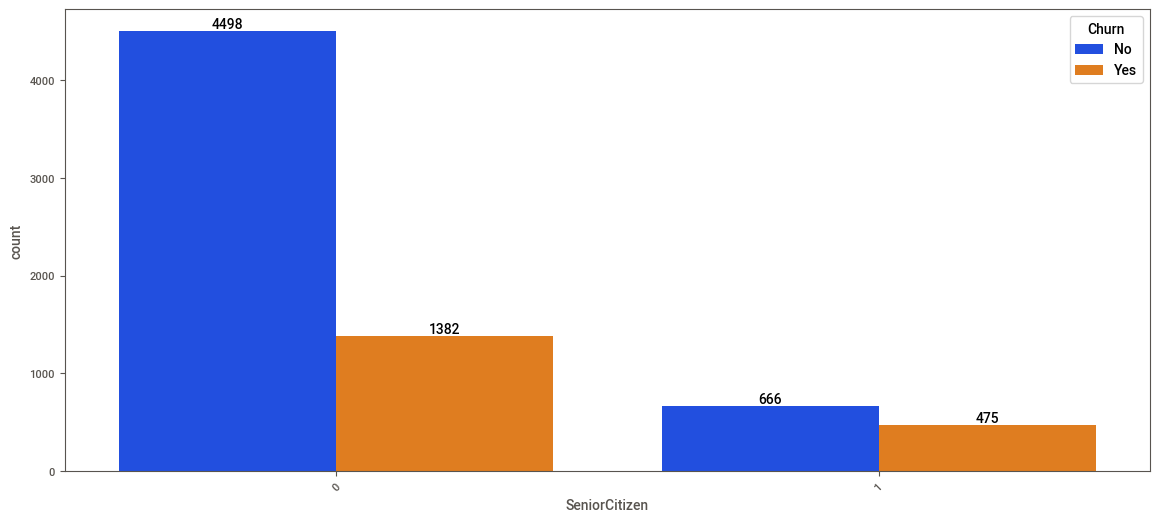

In [29]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x='SeniorCitizen',hue='Churn',data=data,palette='bright')
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [5]:
# Replace empty strings with NaN
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)  


In [6]:
## change the datatype

In [7]:
data['TotalCharges'] = data['TotalCharges'].astype('float32')

In [8]:
data = data.dropna()   ## Drop all NaN values 

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 
 17  

In [36]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [37]:
cat_col = data.select_dtypes(include='object')
cat_col.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [38]:
for i in cat_col:
    print(i,cat_col[i].unique())
    print(cat_col[i].value_counts())
    print('___________________________________')

gender ['Female' 'Male']
gender
Male      3535
Female    3475
Name: count, dtype: int64
___________________________________
Partner ['Yes' 'No']
Partner
No     3617
Yes    3393
Name: count, dtype: int64
___________________________________
Dependents ['No' 'Yes']
Dependents
No     4911
Yes    2099
Name: count, dtype: int64
___________________________________
PhoneService ['No' 'Yes']
PhoneService
Yes    6330
No      680
Name: count, dtype: int64
___________________________________
MultipleLines ['No phone service' 'No' 'Yes']
MultipleLines
No                  3363
Yes                 2967
No phone service     680
Name: count, dtype: int64
___________________________________
InternetService ['DSL' 'Fiber optic' 'No']
InternetService
Fiber optic    3090
DSL            2414
No             1506
Name: count, dtype: int64
___________________________________
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineSecurity
No                     3489
Yes                    2015
No internet serv

In [39]:
num_col = data.select_dtypes(include = (['int','float']))
num_col.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

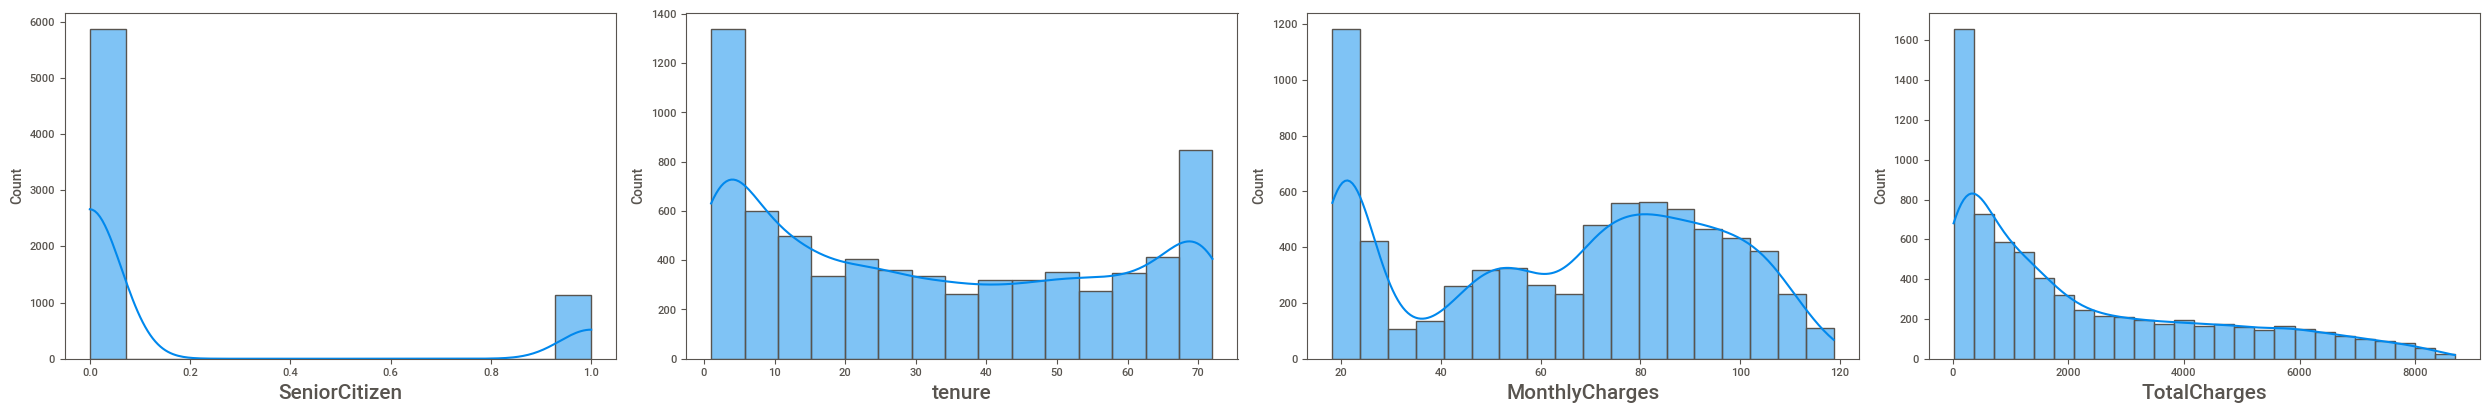

In [40]:
plt.figure(figsize=(25,20))
plotnumber = 1
for i in num_col:
    if plotnumber <= 20:
        ax = plt.subplot(5,4,plotnumber)
        sns.histplot(x=num_col[i],kde=True,palette='Set2')
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

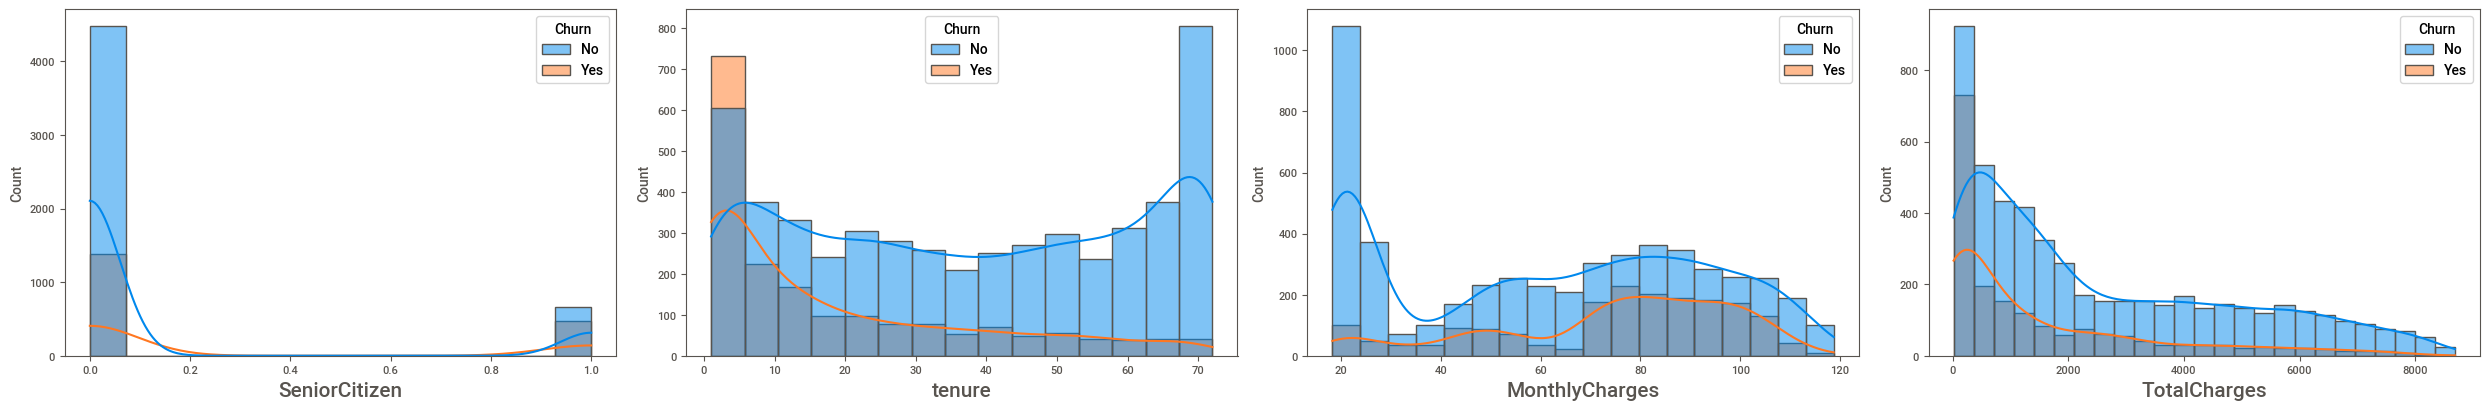

In [41]:
## check any relactionsip between the target column and independent columns usning histograms
plt.figure(figsize=(25,20))
plotnumber = 1
for i in num_col:
    if plotnumber <= 20:
        ax = plt.subplot(5,4,plotnumber)
        sns.histplot(x=num_col[i],kde=True,hue=data['Churn'])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

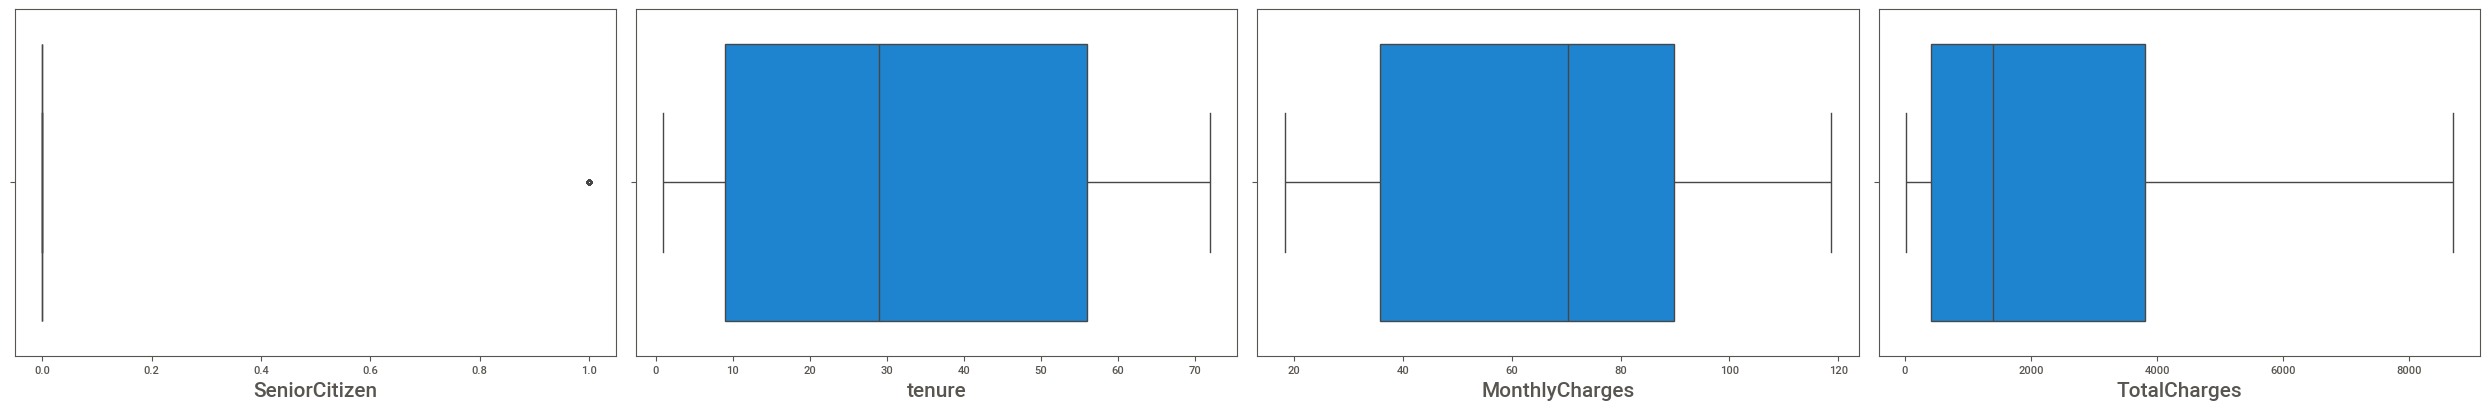

In [42]:
plt.figure(figsize=(25,20))
plotnumber = 1
for i in num_col:
    if plotnumber <= 20:
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(x=num_col[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

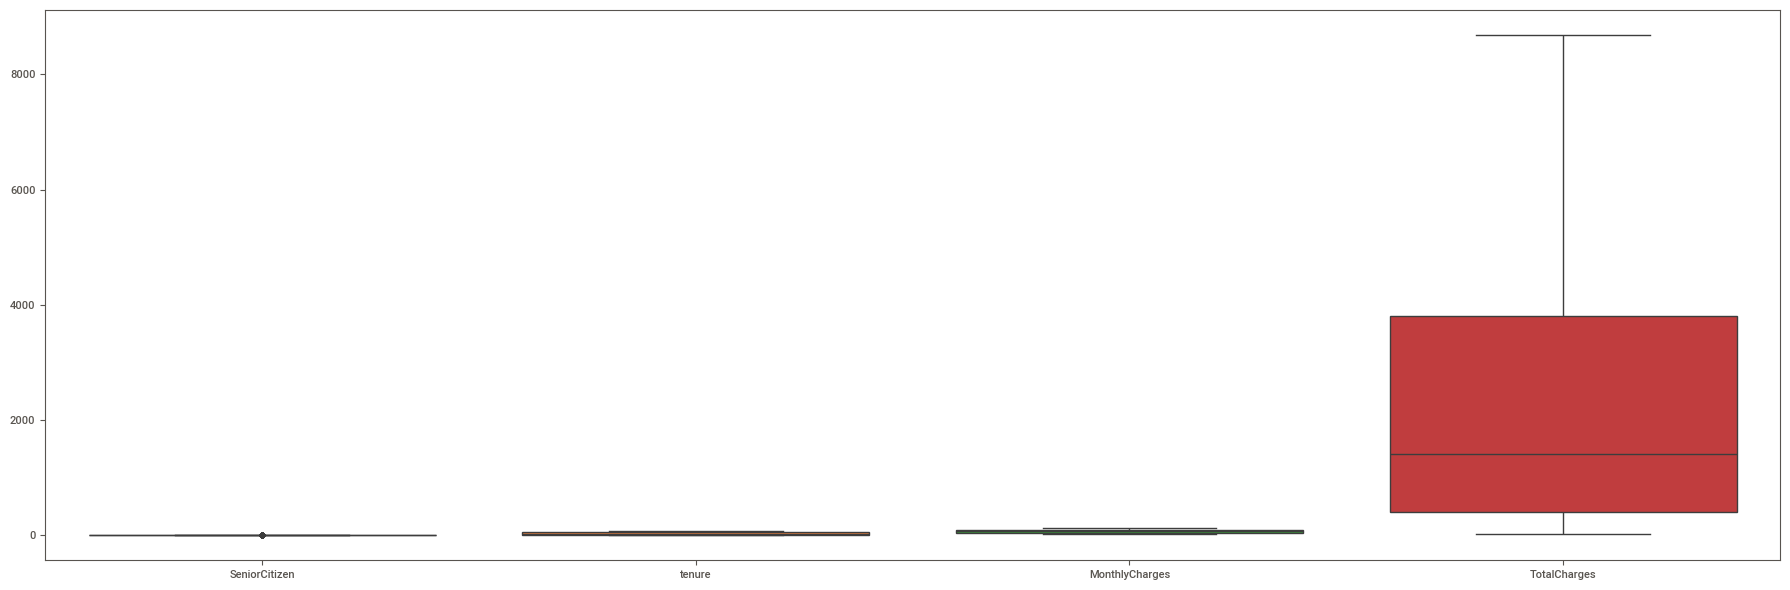

In [43]:
fig, ax = plt.subplots(figsize=(18,6))
sns.boxplot(data = data,ax = ax)
plt.tight_layout()
plt.show()

## Insights

The **Telco Customer Churn** dataset includes various columns that provide insights into customer demographics, subscription plans, service usage, and financial details, which can help in predicting churn. Some of the most useful columns for analysis are:

- **Gender, SeniorCitizen, Partner, Dependents**: Demographic data that may reveal customer loyalty patterns.
- **Tenure**: Length of subscription, critical for churn predictions.
- **Service-related**: Information like PhoneService, InternetService, and support services, helping understand engagement levels.
- **Contract and Payment Methods**: These indicate the likelihood of churn based on contract type (month-to-month contracts often result in higher churn).
- **MonthlyCharges and TotalCharges**: Financial data to correlate spending habits with churn.

## Check Outliers

In [44]:
# tenure
Q1 = data['tenure'].quantile(0.25)
Q3 = data['tenure'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [45]:
len(data.loc[data['tenure'] > upper_limit])/len(data)*100

0.0

In [46]:
len(data.loc[data['tenure'] < lower_limit])/len(data)*100

0.0

Their is no outliers in this column

In [47]:
# MonthlyCharges
Q1 = data['MonthlyCharges'].quantile(0.25)
Q3 = data['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [48]:
len(data.loc[data['MonthlyCharges'] > upper_limit])/len(data)*100

0.0

In [49]:
len(data.loc[data['MonthlyCharges'] < lower_limit])/len(data)*100

0.0

In [50]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


In [51]:
# TotalCharges
Q1 = data['TotalCharges'].quantile(0.25)
Q3 = data['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [52]:
len(data.loc[data['TotalCharges'] > upper_limit])/len(data)*100

0.0

In [53]:
len(data.loc[data['TotalCharges'] < lower_limit])/len(data)*100

0.0

## Label Encoding using Map

In [54]:
## gender
data.gender.value_counts()

gender
Male      3535
Female    3475
Name: count, dtype: int64

In [9]:
data.gender = data.gender.map({'Male':1,'Female':0})
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [10]:
## Partner
data.Partner.value_counts()

Partner
No     3639
Yes    3393
Name: count, dtype: int64

In [11]:
data.Partner = data.Partner.map({'No':1,'Yes':0})
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,1,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [12]:
## Dependents
data.Dependents.value_counts()

Dependents
No     4933
Yes    2099
Name: count, dtype: int64

In [13]:
data.Dependents = data.Dependents.map({'No':1,'Yes':0})
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,1,1,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [14]:
## PhoneService
data.PhoneService.value_counts()

PhoneService
Yes    6352
No      680
Name: count, dtype: int64

In [15]:
data.PhoneService = data.PhoneService.map({'Yes':1,'No':0})
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,1,1,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [16]:
## MultipleLines
data.MultipleLines.value_counts()

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

In [17]:
data.MultipleLines = data.MultipleLines.map({'No':2,'Yes':1,'No phone service':0})
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,0,0,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,1,1,34,1,2,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [18]:
# InternetService
data.InternetService.value_counts()

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

In [19]:
data.InternetService = data.InternetService.map({'Fiber optic':2,'DSL':1,'No':0})
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,0,0,1,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,1,1,34,1,2,1,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [20]:
# OnlineSecurity
data.OnlineSecurity.value_counts()

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

In [21]:
data.OnlineSecurity = data.OnlineSecurity.map({'No':2,'Yes':1,'No internet service':0})
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,0,0,1,2,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,1,1,34,1,2,1,1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [22]:
# OnlineBackup
data.OnlineBackup.value_counts()

OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64

In [23]:
data.OnlineBackup = data.OnlineBackup.map({'No':2,'Yes':1,'No internet service':0})
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,0,0,1,2,1,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,1,1,34,1,2,1,1,2,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [24]:
## DeviceProtection
data.DeviceProtection.value_counts()

DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64

In [25]:
data.DeviceProtection = data.DeviceProtection.map({'No':2,'Yes':1,'No internet service':0})
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,0,0,1,2,1,2,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,1,1,34,1,2,1,1,2,1,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [26]:
## TechSupport
data.TechSupport.value_counts()

TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64

In [27]:
data.TechSupport = data.TechSupport.map({'No':2,'Yes':1,'No internet service':0})
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,0,0,1,2,1,2,2,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,1,1,34,1,2,1,1,2,1,2,No,No,One year,No,Mailed check,56.95,1889.50,No


In [28]:
## StreamingTV
data.StreamingTV.value_counts()

StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64

In [29]:
data.StreamingTV = data.StreamingTV.map({'No':2,'Yes':1,'No internet service':0})
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,0,0,1,2,1,2,2,2,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,1,1,34,1,2,1,1,2,1,2,2,No,One year,No,Mailed check,56.95,1889.50,No


In [30]:
## StreamingMovies
data.StreamingMovies.value_counts()

StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64

In [31]:
data.StreamingMovies = data.StreamingMovies.map({'No':2,'Yes':1,'No internet service':0})
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,0,0,1,2,1,2,2,2,2,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,1,1,34,1,2,1,1,2,1,2,2,2,One year,No,Mailed check,56.95,1889.50,No


In [32]:
## Contract
data.Contract.value_counts()

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

In [33]:
data.Contract = data.Contract.map({'Month-to-month':2,'Two year':1,'One year':0})
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,0,0,1,2,1,2,2,2,2,2,Yes,Electronic check,29.85,29.85,No
1,1,0,1,1,34,1,2,1,1,2,1,2,2,2,0,No,Mailed check,56.95,1889.50,No


In [34]:
## PaperlessBilling
data.PaperlessBilling.value_counts()

PaperlessBilling
Yes    4168
No     2864
Name: count, dtype: int64

In [35]:
data.PaperlessBilling = data.PaperlessBilling.map({'Yes':1,'No':0})
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,0,0,1,2,1,2,2,2,2,2,1,Electronic check,29.85,29.85,No
1,1,0,1,1,34,1,2,1,1,2,1,2,2,2,0,0,Mailed check,56.95,1889.50,No


In [36]:
## PaymentMethod
data.PaymentMethod.value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

In [37]:
data.PaymentMethod = data.PaymentMethod.map({'Electronic check':3,'Mailed check':2,'Bank transfer (automatic)':1,'Credit card (automatic)':0})
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,0,0,1,2,1,2,2,2,2,2,1,3,29.85,29.85,No
1,1,0,1,1,34,1,2,1,1,2,1,2,2,2,0,0,2,56.95,1889.50,No


In [38]:
## Churn
data.Churn.value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [39]:
data.Churn = data.Churn.map({'No':1,'Yes':0})
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,1,0,0,1,2,1,2,2,2,2,2,1,3,29.85,29.85,1
1,1,0,1,1,34,1,2,1,1,2,1,2,2,2,0,0,2,56.95,1889.50,1


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   int64  
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   int64  
 3   Dependents        7010 non-null   int64  
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   int64  
 6   MultipleLines     7010 non-null   int64  
 7   InternetService   7010 non-null   int64  
 8   OnlineSecurity    7010 non-null   int64  
 9   OnlineBackup      7010 non-null   int64  
 10  DeviceProtection  7010 non-null   int64  
 11  TechSupport       7010 non-null   int64  
 12  StreamingTV       7010 non-null   int64  
 13  StreamingMovies   7010 non-null   int64  
 14  Contract          7010 non-null   int64  
 15  PaperlessBilling  7010 non-null   int64  
 16  PaymentMethod     7010 non-null   int64  
 17  

In [41]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Check Corr-Relaction

<Axes: >

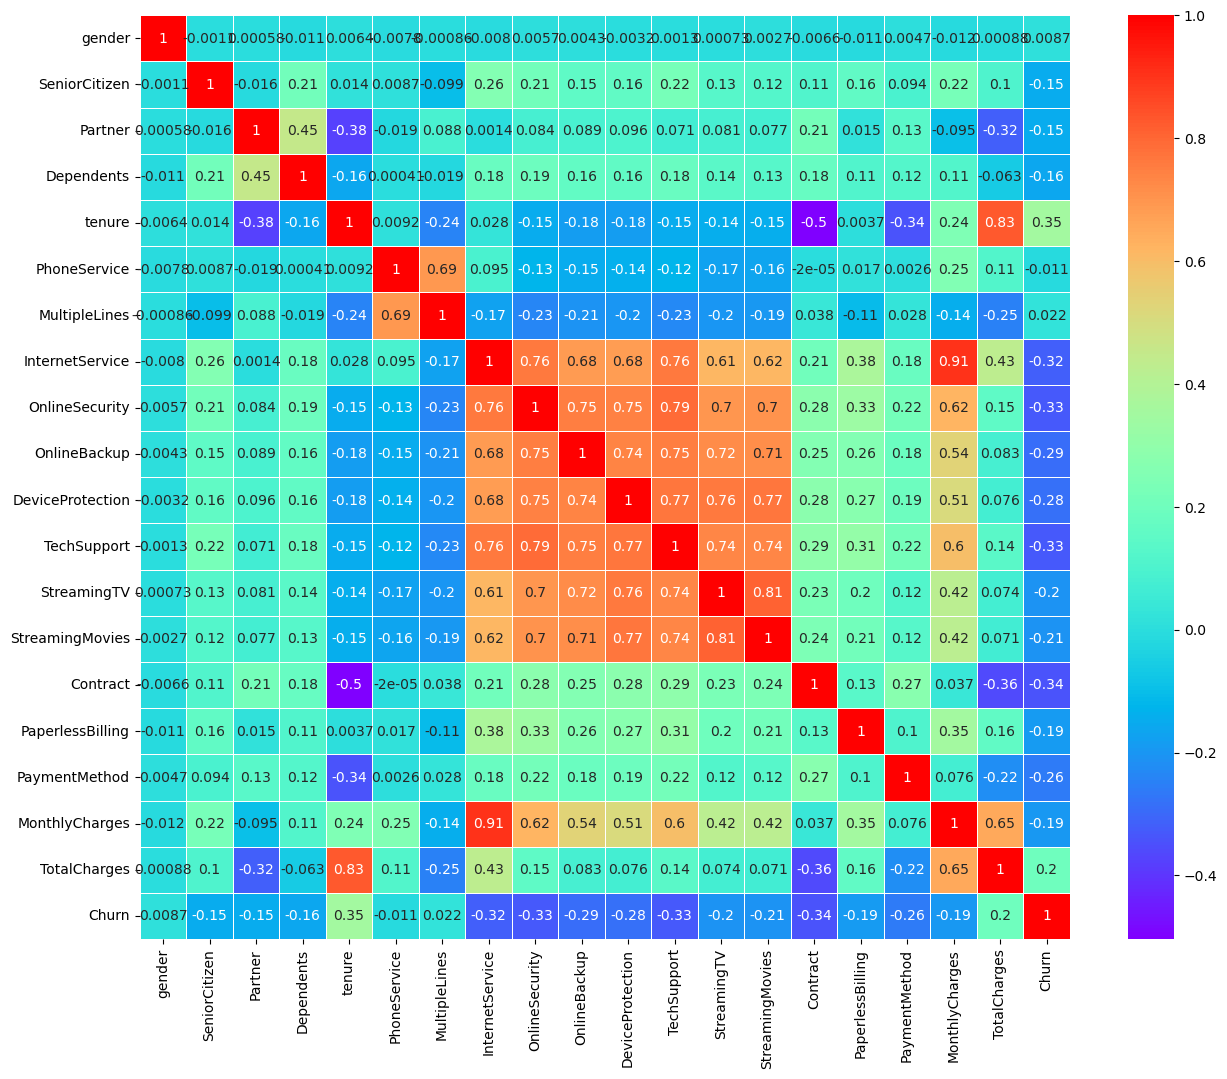

In [46]:
 plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True,cmap='rainbow',linewidth=0.5)

In [47]:
## Copy the data
data1 = data.copy()

In [48]:
## Scale the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data1 [['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']] = scale.fit_transform(data1[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']])

In [49]:
data1.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,-1.008596,-0.440921,-1.032482,0.653764,-1.285566,-3.051036,-2.108024,-0.290611,0.901675,-0.288799,0.996481,0.907279,1.070235,1.077835,0.822693,0.828195,1.145071,-1.165523,-0.997284,1
1,0.991477,-0.440921,0.968540,0.653764,0.060346,0.327757,0.941032,-0.290611,-0.355683,0.998219,-0.289952,0.907279,1.070235,1.077835,-1.669024,-1.207445,0.275883,-0.264071,-0.176848,1
2,0.991477,-0.440921,0.968540,0.653764,-1.244781,0.327757,0.941032,-0.290611,-0.355683,-0.288799,0.996481,0.907279,1.070235,1.077835,0.822693,0.828195,0.275883,-0.367189,-0.962740,0
3,0.991477,-0.440921,0.968540,0.653764,0.508983,-3.051036,-2.108024,-0.290611,-0.355683,0.998219,-0.289952,-0.351634,1.070235,1.077835,-1.669024,-1.207445,-0.593304,-0.751387,-0.198355,1


## Create X & y

In [50]:
X = data1.drop('Churn',axis=1)
y = data.Churn

In [51]:
X.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.008596,-0.440921,-1.032482,0.653764,-1.285566,-3.051036,-2.108024,-0.290611,0.901675,-0.288799,0.996481,0.907279,1.070235,1.077835,0.822693,0.828195,1.145071,-1.165523,-0.997284
1,0.991477,-0.440921,0.968540,0.653764,0.060346,0.327757,0.941032,-0.290611,-0.355683,0.998219,-0.289952,0.907279,1.070235,1.077835,-1.669024,-1.207445,0.275883,-0.264071,-0.176848
2,0.991477,-0.440921,0.968540,0.653764,-1.244781,0.327757,0.941032,-0.290611,-0.355683,-0.288799,0.996481,0.907279,1.070235,1.077835,0.822693,0.828195,0.275883,-0.367189,-0.962740
3,0.991477,-0.440921,0.968540,0.653764,0.508983,-3.051036,-2.108024,-0.290611,-0.355683,0.998219,-0.289952,-0.351634,1.070235,1.077835,-1.669024,-1.207445,-0.593304,-0.751387,-0.198355


In [52]:
y.head(3)

0    1
1    1
2    0
Name: Churn, dtype: int64

In [53]:
## Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=42)

In [54]:
X_train.shape

(5608, 19)

In [55]:
y_test.shape

(1402,)

In [56]:
## SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()
X_smote,y_smote = smote.fit_resample(X_train,y_train)
print('Actual Value:',Counter(y_train))
print('SMOTE Value:',Counter(y_smote))

Actual Value: Counter({1: 4072, 0: 1536})
SMOTE Value: Counter({1: 4072, 0: 4072})


## Check Metrics

In [57]:
from sklearn.metrics import accuracy_score,classification_report

# Create the Models

## Model 1 :- Decision Tree

In [62]:
## Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
accuracy_score(y_test,dt_pred)

0.7475035663338089

In [63]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.46      0.55      0.50       321
           1       0.86      0.81      0.83      1081

    accuracy                           0.75      1402
   macro avg       0.66      0.68      0.66      1402
weighted avg       0.77      0.75      0.76      1402



In [60]:
pd.crosstab(y_test,dt_pred)

col_0,0,1
Churn,,
0,176,145
1,219,862


### Decision Tree using HyperParamater

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {
    'criterion' :('gini','entropy'),
    'splitter':('best','random'),
    'max_depth':(list(range(1,20))),
    'min_samples_split':[1,2,3,4],
    'min_samples_leaf':(list(range(1,20)))
}


dt = DecisionTreeClassifier()
grid = GridSearchCV(dt,params,cv = 3 , scoring='accuracy',verbose=2,n_jobs=-1)

grid.fit(X_train,y_train)
best_params = grid.best_params_
print(f'Best Params:{best_params}')

Fitting 3 folds for each of 5776 candidates, totalling 17328 fits
Best Params:{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [65]:
dt2 = DecisionTreeClassifier(criterion = 'gini',
                            max_depth = 9,
                            min_samples_leaf = 17,
                            min_samples_split = 4,
                            splitter = 'random')
dt2.fit(X_train,y_train)
dt_pred2 = dt2.predict(X_test)
accuracy_score(y_test,dt_pred2)

0.7917261055634808

In [105]:
## check cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(dt2,X,y, cv=3, scoring='accuracy')
print(score)
print('Cross Val Score:',score.mean())
print('Std:',score.std())

[0.79375267 0.77920411 0.78681507]
Cross Val Score: 0.7865906168975171
Std: 0.005941547551993561


## Model 2 :- Random Forest

In [70]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=250)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
accuracy_score(y_test,rf_pred)

0.8052781740370899

In [71]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.58      0.53      0.55       321
           1       0.86      0.89      0.88      1081

    accuracy                           0.81      1402
   macro avg       0.72      0.71      0.71      1402
weighted avg       0.80      0.81      0.80      1402



### Random Forest using HyperParamater

In [107]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'criterion':['gini','entropy'],
    'n_estimators':[50,100,150,200,250,300,350],
    'max_depth':(list(range(1,20))),
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':(list(range(1,20))),
    
}


rf = RandomForestClassifier()
rf_cv = RandomizedSearchCV(estimator = rf, param_distributions=params, cv=3, verbose=3, scoring='accuracy')

rf_cv.fit(X_train,y_train)
best_params = rf_cv.best_params_
print(f'Best Parameters:{best_params}')


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END criterion=gini, max_depth=5, min_samples_leaf=14, min_samples_split=5, n_estimators=150;, score=1.000 total time=   0.9s
[CV 2/3] END criterion=gini, max_depth=5, min_samples_leaf=14, min_samples_split=5, n_estimators=150;, score=1.000 total time=   1.0s
[CV 3/3] END criterion=gini, max_depth=5, min_samples_leaf=14, min_samples_split=5, n_estimators=150;, score=1.000 total time=   0.9s
[CV 1/3] END criterion=entropy, max_depth=8, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=0.999 total time=   0.7s
[CV 2/3] END criterion=entropy, max_depth=8, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.7s
[CV 3/3] END criterion=entropy, max_depth=8, min_samples_leaf=10, min_samples_split=5, n_estimators=100;, score=1.000 total time=   0.7s
[CV 1/3] END criterion=entropy, max_depth=9, min_samples_leaf=15, min_samples_split=5, n_estimators=200;, score=1.000 total ti

In [74]:
rf2 = RandomForestClassifier(n_estimators=250,
                             min_samples_split=3,
                             min_samples_leaf=9,
                             max_depth=8,
                             criterion='gini')
rf2.fit(X_train,y_train)
rf_pred2 = rf2.predict(X_test)
accuracy_score(rf_pred2,y_test)

0.8252496433666191

## Model 3 :- Support Vector Machine

In [77]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
accuracy_score(y_test,svc_pred)

0.8238231098430813

In [78]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.64      0.53      0.58       321
           1       0.87      0.91      0.89      1081

    accuracy                           0.82      1402
   macro avg       0.75      0.72      0.73      1402
weighted avg       0.82      0.82      0.82      1402



## Model 4 :- Bagging Classifier

In [82]:
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier()
bagg.fit(X_train,y_train)
bagg_pred = bagg.predict(X_test)
accuracy_score(y_test,bagg_pred)

0.7710413694721826

In [83]:
print(classification_report(y_test,bagg_pred))

              precision    recall  f1-score   support

           0       0.50      0.59      0.54       321
           1       0.87      0.83      0.85      1081

    accuracy                           0.77      1402
   macro avg       0.69      0.71      0.69      1402
weighted avg       0.79      0.77      0.78      1402



## Model 5 :- Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
LR_pred = LR.predict(X_test)
accuracy_score(y_test,LR_pred)

0.8216833095577746

In [87]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59       321
           1       0.87      0.90      0.89      1081

    accuracy                           0.82      1402
   macro avg       0.75      0.73      0.74      1402
weighted avg       0.82      0.82      0.82      1402



## Model 6 :- Gradient Boosting 

In [90]:
from sklearn.ensemble import GradientBoostingClassifier
gr = GradientBoostingClassifier()
gr.fit(X_train,y_train)
gr_pred = gr.predict(X_test)
accuracy_score(y_test,gr_pred)

0.8245363766048502

In [91]:
print(classification_report(y_test,gr_pred))

              precision    recall  f1-score   support

           0       0.63      0.55      0.59       321
           1       0.87      0.91      0.89      1081

    accuracy                           0.82      1402
   macro avg       0.75      0.73      0.74      1402
weighted avg       0.82      0.82      0.82      1402



## Model 7 :- XG Boost

In [92]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
accuracy_score(y_test,xgb_pred)

0.7995720399429387

In [93]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56       321
           1       0.87      0.87      0.87      1081

    accuracy                           0.80      1402
   macro avg       0.72      0.72      0.72      1402
weighted avg       0.80      0.80      0.80      1402



## Model 8 :- K-NN

In [95]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,11):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    KNN_pred = KNN.predict(X_test)
    error_rate.append(np.mean(KNN_pred != y_test))
error_rate

[0.2710413694721826,
 0.3273894436519258,
 0.24251069900142652,
 0.25891583452211125,
 0.23252496433666192,
 0.25392296718972895,
 0.23109843081312412,
 0.23751783166904422,
 0.2282453637660485,
 0.23537803138373753]

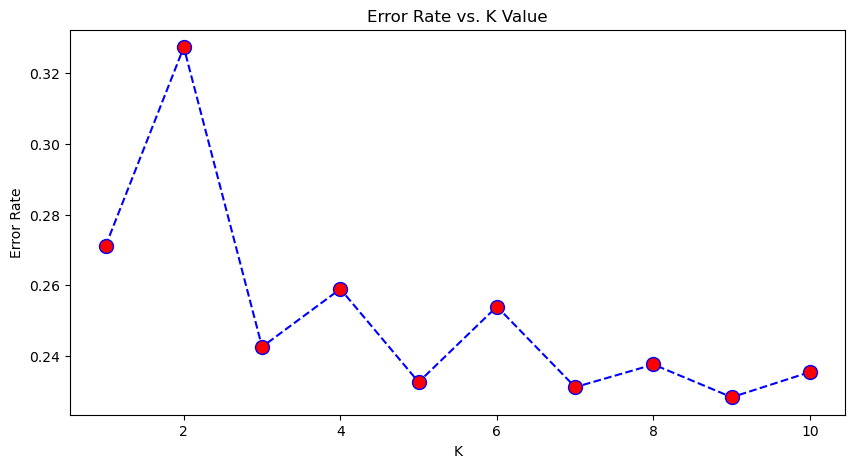

In [96]:
# Lets plot the k-value and error rate
plt.figure(figsize=(10,5))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [97]:
KNN = KNeighborsClassifier(n_neighbors=9)
KNN.fit(X_train,y_train)
KNN_pred = KNN.predict(X_test)
accuracy_score(y_test,KNN_pred)

0.7717546362339515

## Model 10 :- Bagging Classifier using Random Forest base_estimator

In [98]:
model_bagg2 = BaggingClassifier(base_estimator=rf,n_estimators=21)
model_bagg2.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=250),
                  n_estimators=21)

In [100]:
bagg2 = model_bagg2.predict(X_test)
accuracy_score(y_test,bagg2)

0.8166904422253923

## Model 11 :- ANN

In [101]:
from sklearn.neural_network import MLPClassifier  #### Multi layer Preceptron
ANN = MLPClassifier( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=200,
                       random_state=2)
ANN.fit(X_train,y_train)
ANN_pred = ANN.predict(X_test)
accuracy_score(y_test,ANN_pred)

0.8131241084165478

In [102]:
print(classification_report(y_test,ANN_pred))

              precision    recall  f1-score   support

           0       0.60      0.54      0.57       321
           1       0.87      0.89      0.88      1081

    accuracy                           0.81      1402
   macro avg       0.74      0.72      0.73      1402
weighted avg       0.81      0.81      0.81      1402



In [103]:
## check cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(ANN,X,y, cv=3, scoring='accuracy')
print(score)
print('Cross Val Score:',score.mean())
print('Std:',score.std())

[0.77364142 0.7813436  0.79066781]
Cross Val Score: 0.7818842772512079
Std: 0.006961499607926209


# Model Comparison

In [107]:
df = pd.DataFrame()
df['Model']=['Decision Tree','Random Forest','Support Vector Machine','Bagging Classifier','Logistic Regression','Gradient Boosting','XG Boost','K-NN',
            'Bagging Classifier using Random Forest base_estimator','ANN']
df['Accuracy'] = [79,82,82,77,82,82,79,77,81,81]
df

,Model,Accuracy
0,Decision Tree,79
1,Random Forest,82
2,Support Vector Machine,82
3,Bagging Classifier,77
4,Logistic Regression,82
5,Gradient Boosting,82
6,XG Boost,79
7,K-NN,77
8,Bagging Classifier using Random Forest base_es...,81
9,ANN,81


## Visualization 


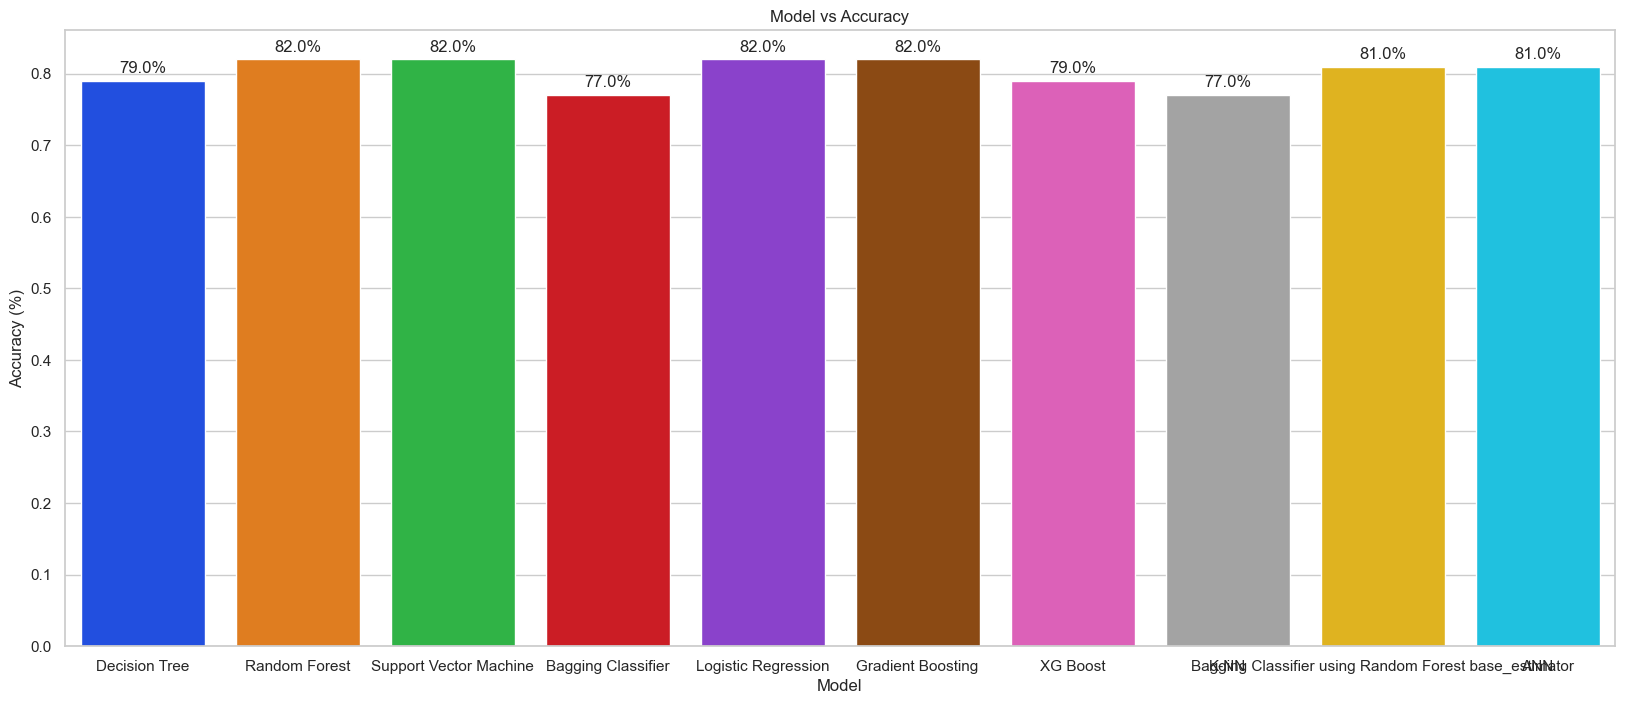

In [108]:

df = {'Model' : ['Decision Tree','Random Forest','Support Vector Machine','Bagging Classifier','Logistic Regression','Gradient Boosting',
                 'XG Boost','K-NN','Bagging Classifier using Random Forest base_estimator','ANN'],
        'Accuracy' : [0.79,0.82,0.82,0.77,0.82,0.82,0.79,0.77,0.81,0.81]}# Accuracy as decimals

df = pd.DataFrame(df)

# Create the plot
plt.figure(figsize=(20, 8))
sns.set(style='whitegrid')

# Barplot
bar_plot = sns.barplot(x='Model', y='Accuracy', data=df, palette='bright')

# Add text annotations
for p in bar_plot.patches:
    percentage = '{:.1f}%'.format(p.get_height() * 100)  # Convert to percentage
    bar_plot.annotate(percentage, 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 9),  # 9 points vertical offset
                      textcoords='offset points')

# Add titles and labels
plt.title('Model vs Accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Model')
plt.show()
